In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy.optimize import curve_fit
from scipy import stats

In [14]:
def load(data): # Loading the data from the excel
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13]) # Specification of the cells that have the values we need; raw data     
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[-1]
    del mean2[0:3]
    return mean2

In [16]:
gain_reps = 9; conc_range = 8; concentration = []; col = []
arr_ = np.zeros((conc_range, gain_reps))

for j in range(conc_range):
    initial = 10 / 2**3
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)

for i in range(gain_reps):        
    a = 'C:\Clariostar\Writeup data\Fluostar data\\f Fluorescein 10uM Gain '
    b = '.xlsx'
    gain = 50*i + 500
    c = a + str(gain) + b  
    
    col.append(gain)
    
    data_ = load(c)
    
    for x in range(len(data_)):
        arr_[x, i] = data_[x]


df = pd.DataFrame(arr_, index = concentration, columns = col)
print(df)

               500       550       600       650        700        750  \
1.250000  1490.375  2551.875  4239.375  6872.500  10850.875  16406.000   
0.625000   757.625  1299.250  2163.500  3502.625   5525.625   8359.750   
0.312500   392.500   674.250  1118.000  1814.625   2862.375   4328.875   
0.156250   179.250   304.250   506.875   822.625   1300.250   1965.250   
0.078125    96.125   161.375   266.500   434.125    686.875   1037.250   
0.039062    46.875    80.125   135.375   220.875    342.375    518.750   
0.019531    23.000    40.750    68.125   109.750    175.000    258.250   
0.009766    12.625    19.125    34.250    56.125     88.125    132.125   

                800        850        900  
1.250000  24598.750  35265.500  49875.875  
0.625000  12555.750  18007.250  25462.500  
0.312500   6515.625   9338.125  13214.375  
0.156250   2955.750   4237.125   6003.125  
0.078125   1555.250   2233.000   3160.125  
0.039062    779.250   1121.625   1587.750  
0.019531    391.375    55

0.9996877927179252
0.9996767040813421
0.9996690330062353
0.9996832662810244
0.9996827476606018
0.999726152776362
0.9996586683465556
0.9997058520974637


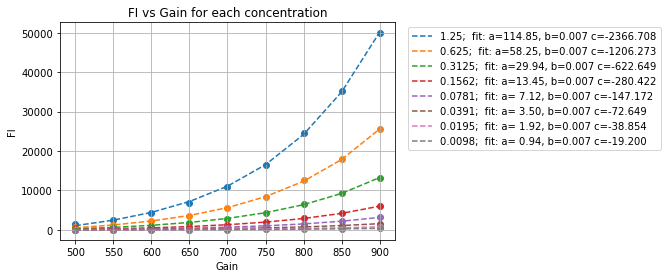

0.006810210705700353


In [17]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []
popt5_blist = []
popt5_clist = []

for i in range(df.shape[0]):
    x1 = df.columns
    y1 = df.iloc[i, :]

    plt.scatter(x1, y1)
    
    
    popt5, pcov5 = curve_fit(func, x1, y1, p0 = [1, 0.006, -50], maxfev = 30000)
#     print(np.round(popt1, 3))
    popt5_alist.append(popt5[0])
    popt5_blist.append(popt5[1])
    popt5_clist.append(popt5[2])
   

    plt.plot(x1, func(x1, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))

    residuals = y1 - func(x1, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y1 - np.mean(y1))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared)    

plt.title("FI vs Gain for each concentration")
plt.xlabel('Gain')
plt.ylabel('FI')

plt.grid()
plt.legend(bbox_to_anchor = (1.025, 1), loc = 2)
plt.show()

bmean = np.mean(popt5_blist)
print(bmean)

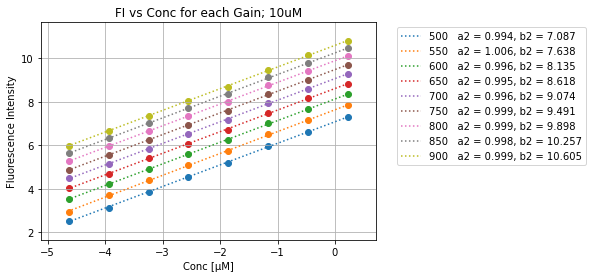

0.9979209873204478


In [18]:
fit2_array = np.zeros((0,2)); a2_list = []; b2_list = []
for i in range(df.shape[1]): 
    x2 = np.log(df.index)
    y2 = np.log(np.array(df.iloc[:, i]))   
    
    fit2 = np.polyfit(x2, y2, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    a2 = fit2[0]
    b2 = fit2[1]
    fit2_equation = a2 * x2 + b2
    fit2_list = [fit2]
    
    fit2_array = np.append(fit2_array, fit2_list, axis = 0)
    a2_list.append(a2); b2_list.append(b2)
    
    plt.scatter(x2, y2)
    plt.plot(x2, fit2_equation, ':', label = str(50*i + 500) + '   a2 = %5.3f, b2 = %5.3f' % tuple(fit2))

plt.title('FI vs Conc for each Gain; 10uM'); plt.xlabel('Conc [µM]'); plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
plt.show()
# print(fit2_array)

a2_array = np.array(a2_list)
a2_mean = np.mean(a2_array)
print(a2_mean)

91.12777081447605 0.006826156166544228 -1893.6020657142942 
 
 0.9996683959365558


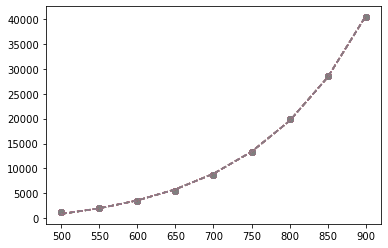

In [25]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c

for i in range(df.shape[0]):
    m = df.columns
    delta = np.exp(b2_list)
    
    popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

    plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
    
    plt.scatter(m, delta)

residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print(*popt9, '\n','\n', r_squared1_1)

                  500          550          600          650           700  \
1.250000  1090.624700  2496.693158  4474.730854  7257.406977  11172.037332   
0.625000   546.098745  1250.146820  2240.591933  3633.936444   5594.074267   
0.312500   273.443137   625.974829  1121.911546  1819.588473   2801.070742   
0.156250   136.918735   313.438774   561.764728   911.106251   1402.555084   
0.078125    68.558093   156.945392   281.287424   456.210079    702.288855   
0.039062    34.328480    78.585862   140.846535   228.433990    351.650813   
0.019531    17.188993    39.349595    70.524825   114.381707    176.078964   
0.009766     8.606890    19.703171    35.313264    57.273329     88.166444   

                   750           800           850           900  
1.250000  16679.085273  24426.324289  35325.033184  50657.186399  
0.625000   8351.569096  12230.774753  17687.987718  25365.119579  
0.312500   4181.806449   6124.206380   8856.747788  12700.849317  
0.156250   2093.918517   3066

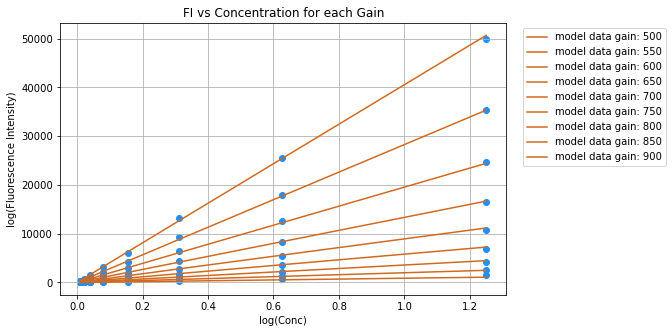

In [20]:
model = list(df.index) # concentrations
model = np.array(model, dtype = float)
model_array = [] # empty array for model
index_gain = []

for gn in range(gain_reps): 
    gain = 50*gn + 500
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a2_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(8,5))

for i in range(df.shape[1]):
    gain = 50*i + 500
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y, c = 'dodgerblue')
    plt.plot(x_model, y_model, linewidth = 1.5, c = 'chocolate', label = 'model data gain: %2.0f' % gain)


plt.title('FI vs Concentration for each Gain')
plt.xlabel('log(Conc)')
plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.025, 1))
plt.grid()
    
plt.show()

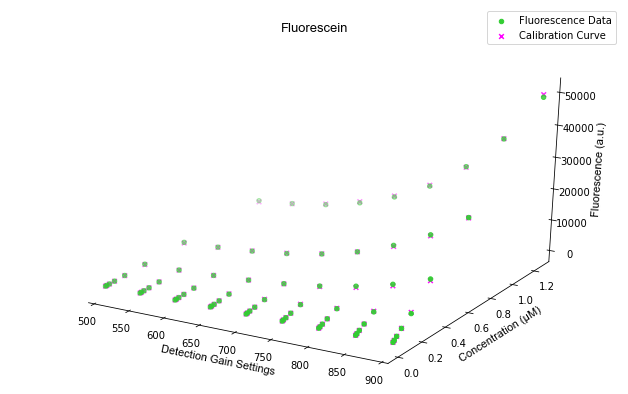

In [26]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')

x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)

ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='limegreen', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='magenta', marker='x')

ax.set_title('Fluorescein', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5); 
ax.grid(False)
ax.set_xlim(500,900)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

plt.savefig('Fluostar Fluorescein 3D.png', dpi=300)

plt.show()

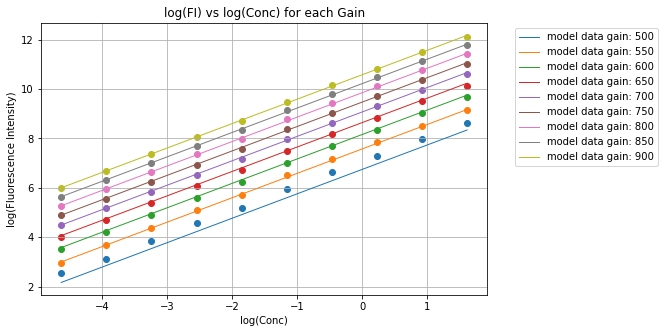

Model dataframe: 
 
                   500          550           600           650           700  \
5.000000  4189.246497  9594.973406  17185.024836  27842.033908  42805.284606   
2.500000  2111.117174  4835.264088   8660.173398  14030.636772  21571.175518   
1.250000  1063.870490  2436.669474   4364.183584   7070.559890  10870.517917   
0.625000   536.123922  1227.928406   2199.274481   3563.118195   5478.058425   
0.312500   270.172791   618.798810   1108.296237   1795.587827   2760.597456   
0.156250   136.150121   311.835743    558.511709    904.863512   1391.167768   
0.078125    68.611112   157.145633    281.454830    455.994390    701.061198   
0.039062    34.575692    79.191531    141.835561    229.792539    353.290821   
0.019531    17.423978    39.907559     71.476216    115.801010    178.036389   
0.009766     8.780591    20.110904     36.019525     58.356437     89.719161   

                   750           800            850            900  
5.000000  63814.825832  93313

In [25]:
plt.figure(figsize=(8,5))
for i in range(df.shape[1]):
    gain = 50*i + 500
    
    x = np.log(df.index)
    y = np.log(df.iloc[:, i])
    
    x_model = np.log(model_df.index)
    y_model = np.log(model_df.iloc[:, i])
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, linewidth = 1, label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.05, 1)); plt.grid()
    
plt.show()
print('Model dataframe:', "\n", "\n", model_df)

In [ ]:
fit_array = np.zeros((0, 2))


for i in range(df.shape[0]):
    x1 = np.array(df.columns)
    y1 = np.array(df.iloc[i,:])
    
    fit1 = np.polyfit(x1, np.log(y1), 1)
    fit1_list = [fit1]
    a1 = fit1[0]
    b1 = fit1[1]
    fit_equation = a1 * x1 + b1
    
    fit_array = np.append(fit_array, fit1_list, axis = 0)
    
    plt.scatter(x1, np.log(y1))
    plt.plot(x1, fit_equation, label = str(round(initial * 0.5**i, 4)) + '; fit: a1=%5.3f, b1=%5.3f' % tuple(fit1))

print(fit_array, "\n", fit_array.shape)


plt.title("log(FI) vs Gain for each Conc")
plt.xlabel("Gain")
# plt.xticks(x, col)
plt.ylabel("log(FI)")
# plt.legend(df.index, bbox_to_anchor=(1.05, 1), loc=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.grid()
plt.margins(0.10) 

plt.show()